In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/fertilizer.csv")

In [ ]:
data.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
data.shape

(99, 9)

In [ ]:
data["Fertilizer Name"].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [ ]:
data["Soil Type"].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

In [ ]:
data["Crop Type"].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [ ]:
data.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
continuous_data_cols = ["Temparature", "Humidity ", "Moisture", "Nitrogen", "Phosphorous"]
categorical_data_cols = ["Soil Type", "Crop Type"]

<Figure size 2100x1700 with 0 Axes>

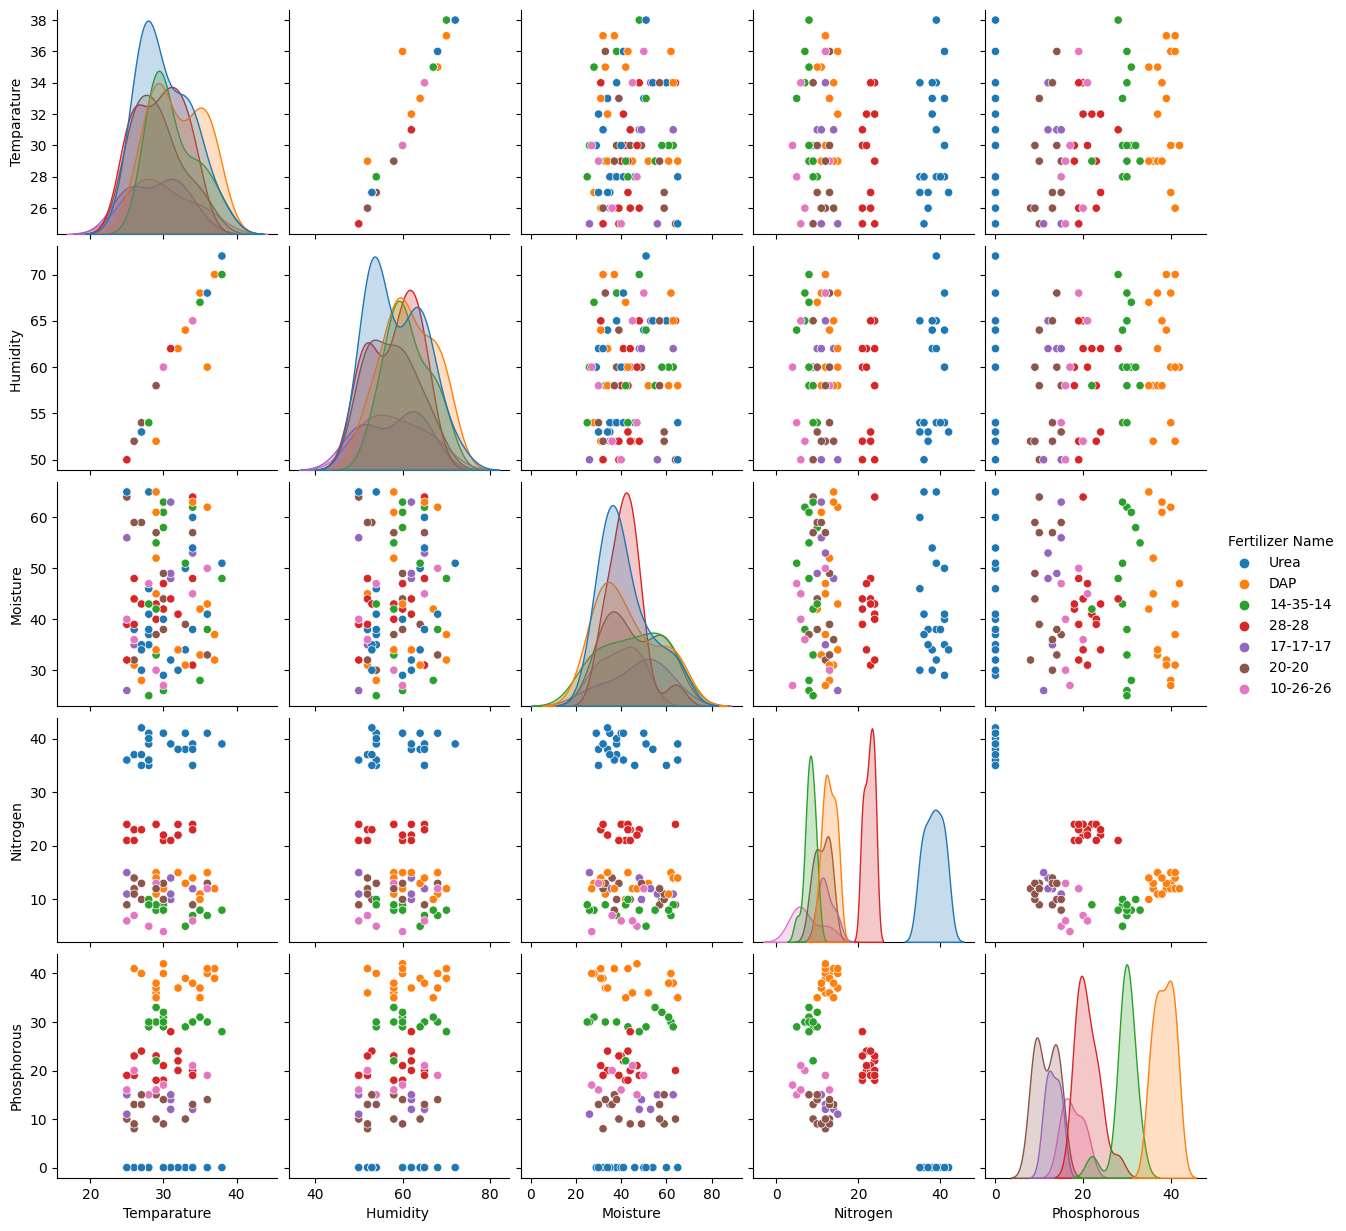

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(21,17))
sns.pairplot(data[continuous_data_cols + ["Fertilizer Name"]], hue = "Fertilizer Name")
plt.show()

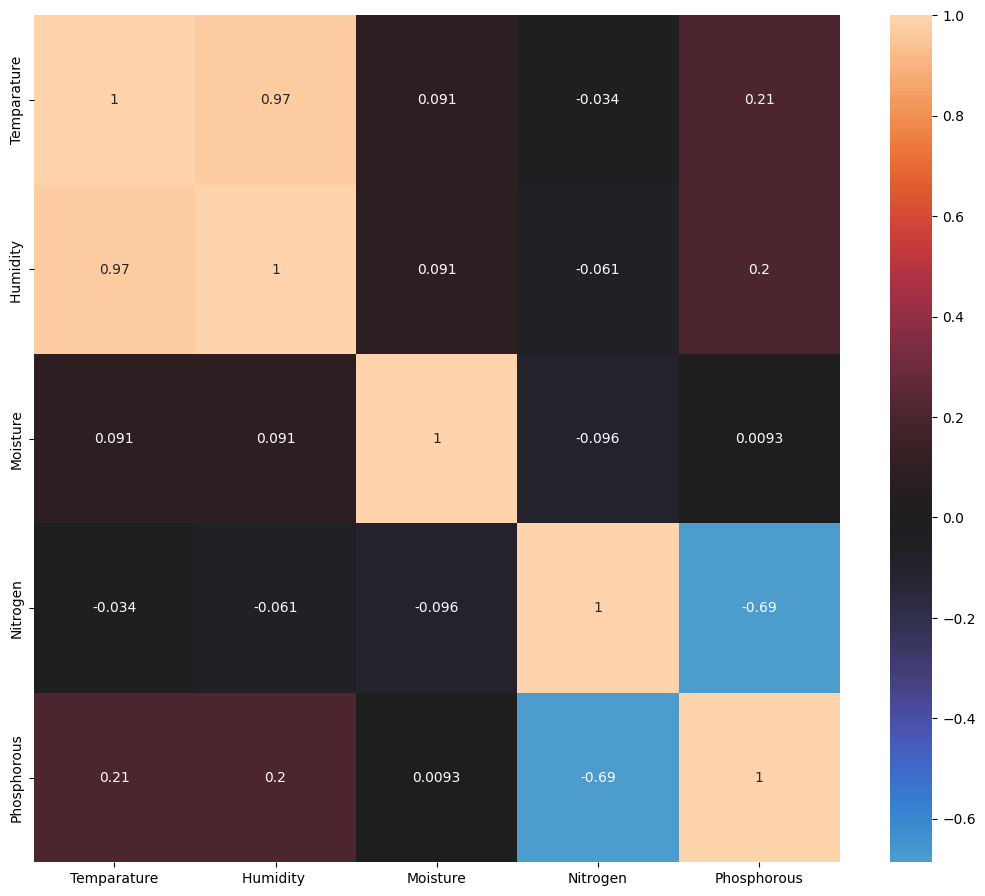

In [ ]:
plt.figure(figsize = (13,11))
sns.heatmap(data[continuous_data_cols].corr(), center = 0, annot = True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

soil_type_label_encoder = LabelEncoder()
data["Soil Type"] = soil_type_label_encoder.fit_transform(data["Soil Type"])

crop_type_label_encoder = LabelEncoder()
data["Crop Type"] = crop_type_label_encoder.fit_transform(data["Crop Type"])

In [ ]:
croptype_dict = {}
for i in range(len(data["Crop Type"].unique())):
    croptype_dict[i] = crop_type_label_encoder.inverse_transform([i])[0]
print(croptype_dict)

soiltype_dict = {}
for i in range(len(data["Soil Type"].unique())):
    soiltype_dict[i] = soil_type_label_encoder.inverse_transform([i])[0]
print(soiltype_dict)

{0: 'Barley', 1: 'Cotton', 2: 'Ground Nuts', 3: 'Maize', 4: 'Millets', 5: 'Oil seeds', 6: 'Paddy', 7: 'Pulses', 8: 'Sugarcane', 9: 'Tobacco', 10: 'Wheat'}
{0: 'Black', 1: 'Clayey', 2: 'Loamy', 3: 'Red', 4: 'Sandy'}


In [ ]:
fertname_label_encoder = LabelEncoder()
data["Fertilizer Name"] = fertname_label_encoder.fit_transform(data["Fertilizer Name"])

In [ ]:
fertname_dict = {}
for i in range(len(data["Fertilizer Name"].unique())):
    fertname_dict[i] = fertname_label_encoder.inverse_transform([i])[0]
print(fertname_dict)

{0: '10-26-26', 1: '14-35-14', 2: '17-17-17', 3: '20-20', 4: '28-28', 5: 'DAP', 6: 'Urea'}


In [ ]:
data.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6


In [ ]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [ ]:
from collections import Counter

counter = Counter(y)
counter

Counter({6: 22, 5: 18, 1: 14, 4: 17, 2: 7, 3: 14, 0: 7})

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE


upsample = SMOTE()
X, y = upsample.fit_resample(X, y)
counter = Counter(y)
print(counter)

Counter({6: 22, 5: 22, 1: 22, 4: 22, 2: 22, 3: 22, 0: 22})


In [ ]:
print("Total samples after upsampling ")
len(X)

Total samples after upsampling 


154

In [ ]:
acc = []
model = []

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state = 0)

Accuracy at k = 1 is 0.9354838709677419
Accuracy at k = 2 is 0.9354838709677419
Accuracy at k = 3 is 0.967741935483871
Accuracy at k = 4 is 0.8709677419354839
Accuracy at k = 5 is 0.9032258064516129
Accuracy at k = 6 is 0.8709677419354839
Accuracy at k = 7 is 0.8064516129032258
Accuracy at k = 8 is 0.7419354838709677
Accuracy at k = 9 is 0.7741935483870968
Accuracy at k = 10 is 0.7741935483870968
Accuracy at k = 11 is 0.7741935483870968
Accuracy at k = 12 is 0.7096774193548387
Accuracy at k = 13 is 0.7419354838709677
Accuracy at k = 14 is 0.7419354838709677
Accuracy at k = 15 is 0.7741935483870968
Accuracy at k = 16 is 0.7741935483870968
Accuracy at k = 17 is 0.7741935483870968
Accuracy at k = 18 is 0.8064516129032258
Accuracy at k = 19 is 0.7741935483870968
Minimum error:- 2.7096774193548385 at K = 6


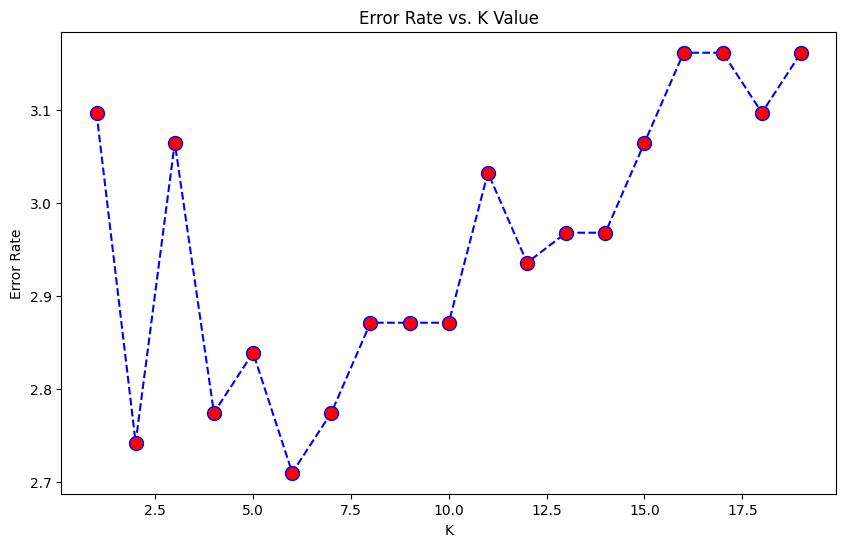

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

error_rate = []
for i in range(1, 20):
    pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = i))
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy at k = {i} is {accuracy}")
    error_rate.append(np.mean(predictions))
    x = accuracy.mean()


acc.append(x)
model.append('KNN')
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

Accuracy on Test Data: 93.54838709677419


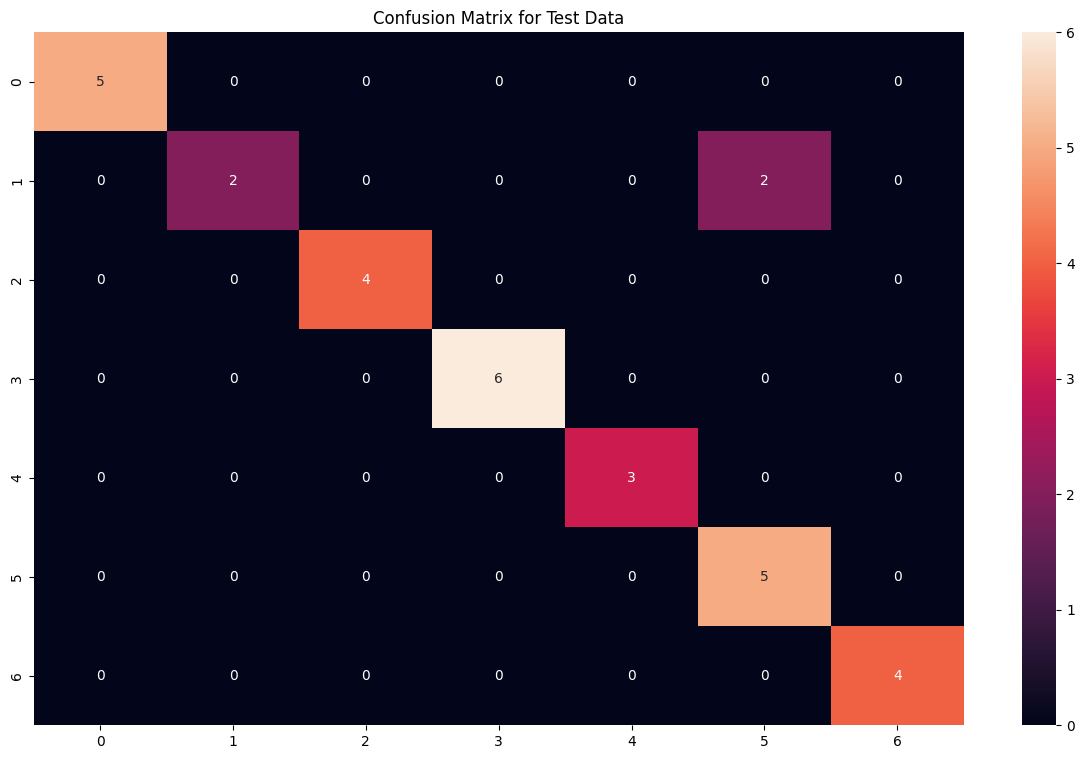


Accuracy on Whole Data: 98.7012987012987


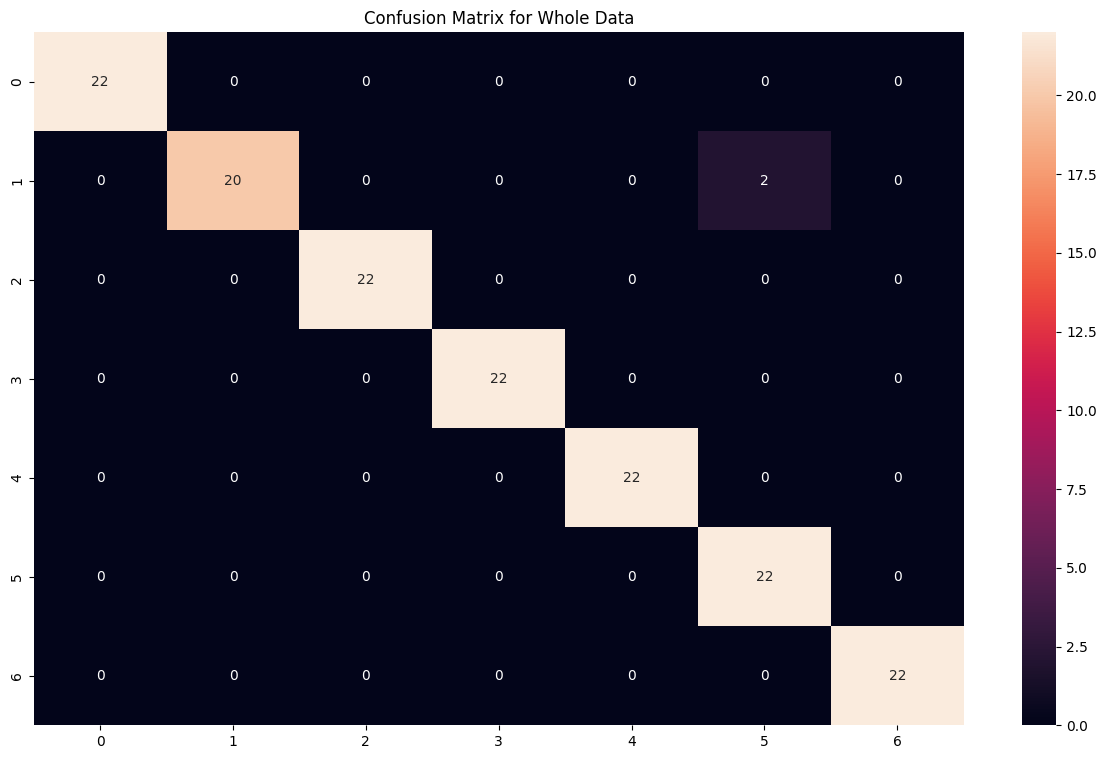

In [ ]:
from sklearn.svm import SVC

svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)

predictions = svm_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on Test Data: {accuracy*100}")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True)
plt.title("Confusion Matrix for Test Data")
plt.show()

print()

acc.append(accuracy)
model.append('SVC')
predictions = svm_pipeline.predict(X.values)
accuracy = accuracy_score(y, predictions)
print(f"Accuracy on Whole Data: {accuracy*100}")
plt.figure(figsize = (15,9))
sns.heatmap(confusion_matrix(y, predictions), annot = True)
plt.title("Confusion Matrix for Whole Data")
plt.show()

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

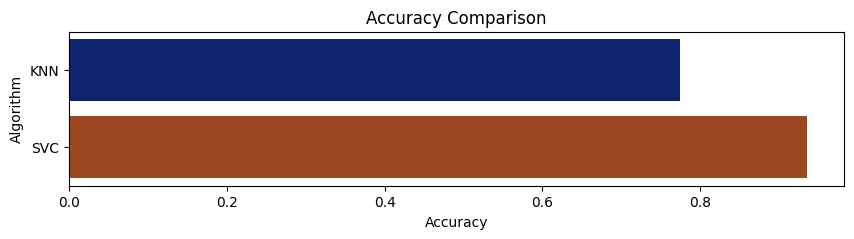

In [ ]:
plt.figure(figsize=[10,2],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [ ]:
import pickle

pickle.dump(svm_pipeline, open("svm_pipeline.pkl", "wb"))
pickle.dump(fertname_dict, open("fertname_dict.pkl", "wb"))
pickle.dump(croptype_dict, open("croptype_dict.pkl", "wb"))
pickle.dump(soiltype_dict, open("soiltype_dict.pkl", "wb"))

In [ ]:
data = np.array([[32, 65, 31, 2, 7, 19, 5, 23]])
prediction = svm_pipeline.predict(data)
print(prediction)

[4]


In [ ]:
fertname_dict[4]

'28-28'

In [ ]:
data = np.array([[34,	65,	62,	0,	1,	7,	9,	30]])
prediction = svm_pipeline.predict(data)
print(prediction)

[1]


In [ ]:
fertname_dict[1]

'14-35-14'

In [ ]:
data = np.array([[34,	65,	62,	0,	1,	7,	9,	30]])
prediction = pipeline.predict(data)
print(prediction)

[0]


In [ ]:
data = np.array([[6, 2, 4, 1, 5, 9, 1, 5]])
prediction = pipeline.predict(data)
print(prediction)

[2]
